## Grid-Based Filter Design


In [1]:
# # Uncomment the following lines to run the notebook in the root directory of the repository
# import os

# # set the current working directory
# curr_path = os.getcwd().split("/")[:-2]
# curr_path = "/".join(curr_path)
# os.chdir(curr_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pytspl import load_dataset, SCPlot

# load the dataset
sc, coordinates, flow = load_dataset("paper")

# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2
Coordinates: 7
Flow: 10


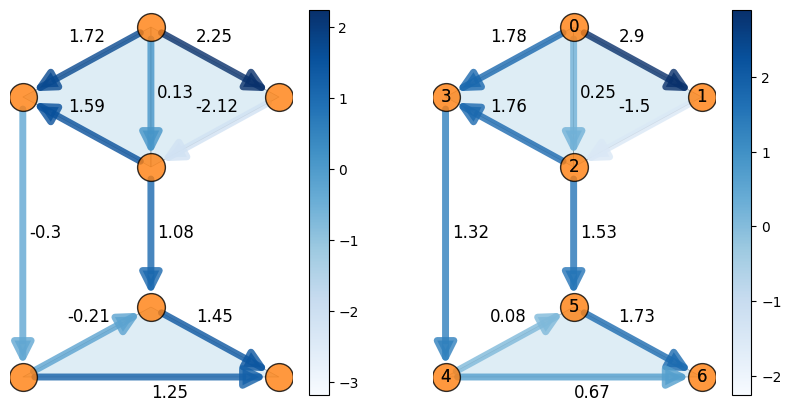

In [4]:
f0 = np.asarray(list(flow.values()))
f = [2.90, 0.25, 1.78, -1.50, 1.76, 1.53, 1.32,  0.08, 0.67, 1.73]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

In [5]:
from pytspl.filters import GridBasedFilterDesign

gbf = GridBasedFilterDesign(simplicial_complex=sc)

### Denoising

mu: 0.5, error: 0.7024
Filter size: 0 - Error: 0.5471
Filter size: 1 - Error: 0.7107
Filter size: 2 - Error: 0.7085
Filter size: 3 - Error: 0.7047
Filter size: 4 - Error: 0.7018
Filter size: 5 - Error: 0.7025
Filter size: 6 - Error: 0.7024
Filter size: 7 - Error: 0.7024
Filter size: 8 - Error: 0.7024
Filter size: 9 - Error: 0.7024
Filter size: 10 - Error: 0.7024
Filter size: 11 - Error: 0.7026
Filter size: 12 - Error: 0.704
Filter size: 13 - Error: 0.713
Filter size: 14 - Error: 0.7643


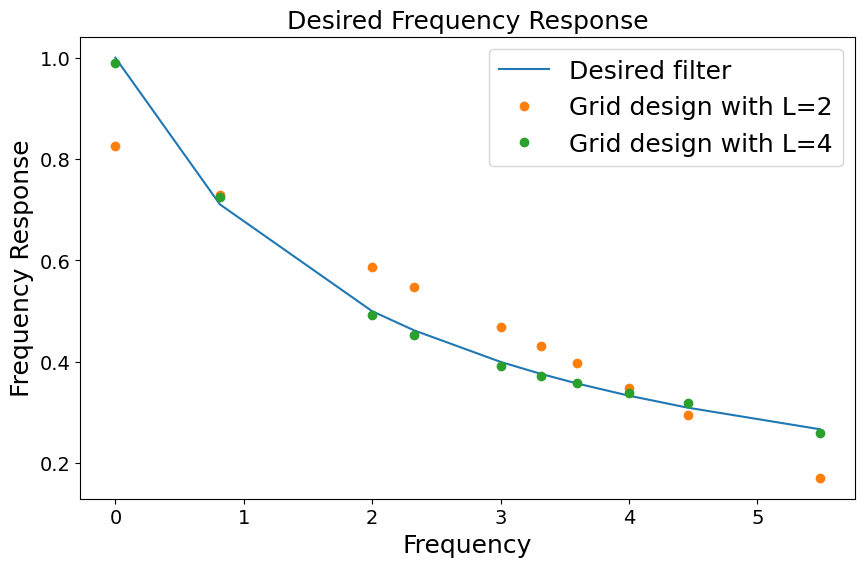

In [6]:
from pytspl.filters import EdgeFlowDenoising
import matplotlib.pyplot as plt
from pytspl.decomposition.eigendecomposition import get_eigendecomposition

    
efd = EdgeFlowDenoising(simplicial_complex=sc)
efd.denoise(f=f, f_true=f0, p_choice="L1")
efd.plot_desired_frequency_response(p_choice="L1")


gbf = GridBasedFilterDesign(sc)
_, eigenvals = get_eigendecomposition(sc.hodge_laplacian_matrix().toarray())
gbf.denoise(f=f, f_true=f0,  L=15, p_choice="L1", mu=0.5)
plt.plot(eigenvals, gbf.history["frequency_responses"][1], 'o')
plt.plot(eigenvals, gbf.history["frequency_responses"][3], 'o')


plt.legend(["Desired filter", "Grid design with L=2", "Grid design with L=4"], fontsize=18)

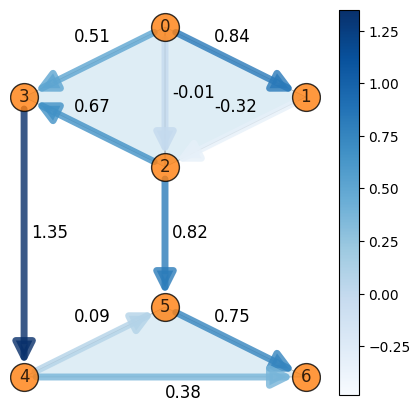

In [7]:
f_est = gbf.history["f_estimated"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est, 2), ax=ax)

In [8]:
efd.denoise(f=f, f_true=f0, p_choice="L1", mu_vals=[0.5])

mu: 0.5, error: 0.7024


In [9]:
efd.denoise(f=f, f_true=f0, p_choice="L1L", mu_vals=[0.5])

mu: 0.5, error: 0.7309


### Subcomponent extraction

Filter size: 0 - Error: 0.2338


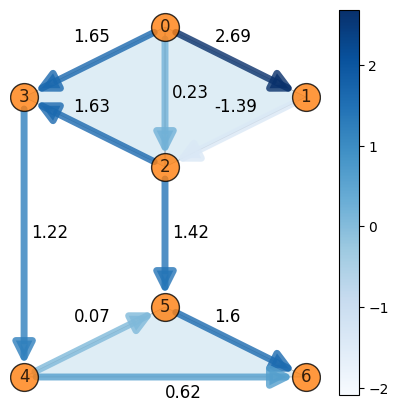

In [10]:
filter_size = 1
component = "gradient"

gbf.subcomponent_extraction(f=f, component=component,  L=filter_size, p_choice="L1L")

f_est = gbf.history["f_estimated"]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
scplot.draw_network(edge_flow=np.round(f_est, 2), ax=ax)

In [11]:
gbf.history

{'filter': array([[0.92689414, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.92689414, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.92689414, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.92689414, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.92689414,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.92689414, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.92689414, 0.        , 0.        , 0.        ],
        [0.      